------------------------------------

In [47]:
import numpy as np
import matplotlib.pyplot as plt
#
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_functions_type):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_size = output_size
        self.af_type = activation_functions_type
        self.layers = len(hidden_layer_sizes) + 1 

        self.weights = [np.random.random((input_size, hidden_layer_sizes[0]))]
        self.biases = [np.random.random((1, hidden_layer_sizes[0]))]

        for i in range(1, self.layers-1):
            self.weights.append(np.random.random((hidden_layer_sizes[i - 1], hidden_layer_sizes[i])))
            self.biases.append(np.random.random((1, hidden_layer_sizes[i])))
        self.weights.append(np.random.random((hidden_layer_sizes[self.layers-2], output_size)))
        self.biases.append(np.random.random((1, output_size)))
    
    def activation_function(self, x, type='sigmoid'):
        if type == 'sigmoid':
            return 2 / (1 + np.exp(-x)) - 1
        elif type == 'linear':
            return x
        elif type == 'ReLU':
            return np.maximum(0, x)  # ReLU activation function

    def activation_function_derivative(self, x, type='sigmoid'):
        if type == 'sigmoid':
            return (1 - self.activation_function(x, type='sigmoid') ** 2) / 2
        elif type == 'linear':
            return 1
        elif type == 'ReLU':
            return np.where(x <= 0, 0, 1)  # Derivative of ReLU

    def forward(self, x):
        layer_output = x

        for i in range(self.layers):
            layer_input = layer_output @ self.weights[i] + self.biases[i]
            layer_output = self.activation_function(layer_input, self.af_type[i])

        return layer_output

    def gradient_calculation(self, x, e):
        layer_outputs = [x]
        layer_inputs = []

        # Forward pass
        for i in range(self.layers):
            layer_input = layer_outputs[i] @ self.weights[i] + self.biases[i]
            layer_inputs.append(layer_input)
            layer_output = self.activation_function(layer_input, self.af_type[i])
            layer_outputs.append(layer_output)

        # Backpropagation
        error = e#(e @ np.linalg.pinv(Ac) @ np.ones([2,1])) - .01*layer_output                       #y - layer_outputs[-1]
        delta = error * self.activation_function_derivative(layer_inputs[-1], self.af_type[-1])
        grads = [{'weights': 0, 'bias': 0} for _ in range(self.layers)]

        for i in range(self.layers - 1, -1, -1):
            grads[i]['weights'] = np.sum(np.expand_dims(delta, 1) * np.expand_dims(layer_outputs[i], 2), 0)
            grads[i]['bias'] = np.sum(delta, axis=0, keepdims=True)
            # if i > 0:
            error = delta @ self.weights[i].T
            delta = error * self.activation_function_derivative(layer_inputs[i - 1], self.af_type[i - 1])
        return grads, delta

    def train(self, x, e, learning_rate=0.001):
        grads, delta = self.gradient_calculation(x, e)

        for j in range(self.layers):
            self.weights[j] += learning_rate * grads[j]['weights']
            self.biases[j] += learning_rate * grads[j]['bias']
        # return delta


In [48]:
import numpy as np
import matplotlib.pyplot as plt

class RBFnn:
    def __init__(self, input_size, neuron_num, output_size):
        self.L = output_size
        self.N = input_size
        self.M = neuron_num
        self.mu = np.random.random([input_size, neuron_num])
        self.sigma = np.ones([input_size, neuron_num])
        self.W = np.random.random([neuron_num, output_size])
        self.bias = np.zeros([1, output_size])

    def forward(self, x):
        phi = np.exp(-((np.expand_dims(x,-1)-np.expand_dims(self.mu,0))/np.expand_dims(self.sigma,0))**2)
        phi = phi.prod(1)
        self.phi = phi
        y_hat = phi @ self.W + self.bias
        return(y_hat)
    def grad(self, x, e):
        error1 = e 
        error = (np.expand_dims(self.W, 0)*np.expand_dims(error1, 1)).mean(-1)  # sample * neuron_num

        grad_W = (np.expand_dims(self.phi,-1)*np.expand_dims(error1, 1)).mean(0)

        grad_mu = (np.expand_dims(self.phi,1)*(np.expand_dims(x,-1)-np.expand_dims(self.mu,0))/np.expand_dims(self.sigma,0)**2)*np.expand_dims(error, 1)
        grad_mu = grad_mu.mean(0)

        grad_sigma = (np.expand_dims(self.phi,1)*(np.expand_dims(x,-1)-np.expand_dims(self.mu,0))**2/np.expand_dims(self.sigma,0)**3)*np.expand_dims(error, 1)
        grad_sigma = grad_sigma.mean(0)

        grad_bias = error1.mean(-1).mean(0)#*0

        grad_for_previous = -(np.expand_dims(self.phi,1)*(np.expand_dims(x,-1)-np.expand_dims(self.mu,0))/np.expand_dims(self.sigma,0)**2)*np.expand_dims(error, 1)
        grad_for_previous = grad_for_previous.sum(-1)
        return(grad_W, grad_mu, grad_sigma, grad_bias, grad_for_previous)
    def Train(self, x, e, learning_rate = 0.01):#e, Ac
        grad_W, grad_mu, grad_sigma, grad_bias, grad_for_previous = self.grad(x, e)#e, Ac
        self.W -= learning_rate * grad_W
        self.mu -= learning_rate * grad_mu
        self.sigma -= learning_rate * grad_sigma
        self.bias -= learning_rate * grad_bias
        # return grad_for_previous
            

In [49]:
import numpy as np

class Pendulum_Nonlinear_System:
    def __init__(self, dt = 0.01):
        self.y = np.array([0])
        self.Ac = -20*np.eye(2)
        self.dt = dt
        self.t = np.linspace(0, 15, int((15-0)/dt))
        self.x = np.array([[.5],[.5]])
        self.reference = np.sin(self.t)
    def step(self, u):
        self.x_dot = np.array([[self.x[1,0]], [-5*self.x[0,0]**3-2*self.x[1,0]+u]])
        self.x += self.x_dot * self.dt
        self.y = self.x[0]



##  Pendulum Nonlinear System

<img src="pendulum.png">

In [60]:
controller = MultilayerPerceptron(input_size = 2, hidden_layer_sizes = [4, 4], output_size = 1, activation_functions_type = ['sigmoid', 'sigmoid', 'linear'])
observer = MultilayerPerceptron(input_size = 2, hidden_layer_sizes = [2], output_size = 1, activation_functions_type = ['sigmoid', 'linear'])

plant = Pendulum_Nonlinear_System(dt = 0.001)
history = {'y': [], 'y_observer': [], 'u':[]}
for i in range(len(plant.t)):
    input_ = np.array([[plant.y[0], plant.reference[i]]])

    u = controller.forward(input_)
    obs_input = np.hstack((plant.y.reshape([1,-1]), u))
    y_hat = observer.forward(obs_input)
    plant.step(u[0,0])
    
    Loss_derivative_controller = -(y_hat - plant.reference[i]).reshape([-1,1])
    loss_derivative_observer = -(y_hat - plant.y)
    
    _, grad_for_previous = observer.gradient_calculation(obs_input, Loss_derivative_controller)
    controller.train(input_, grad_for_previous[:,plant.y.shape[0]:] - .07*u, learning_rate=1)

    observer.train(obs_input, loss_derivative_observer*2 - 0.2*y_hat*0 , learning_rate=.06)
    
    history['y'].append(plant.y[0])
    history['y_observer'] .append(y_hat[0])
    history['u'].append(u[0,0])
    


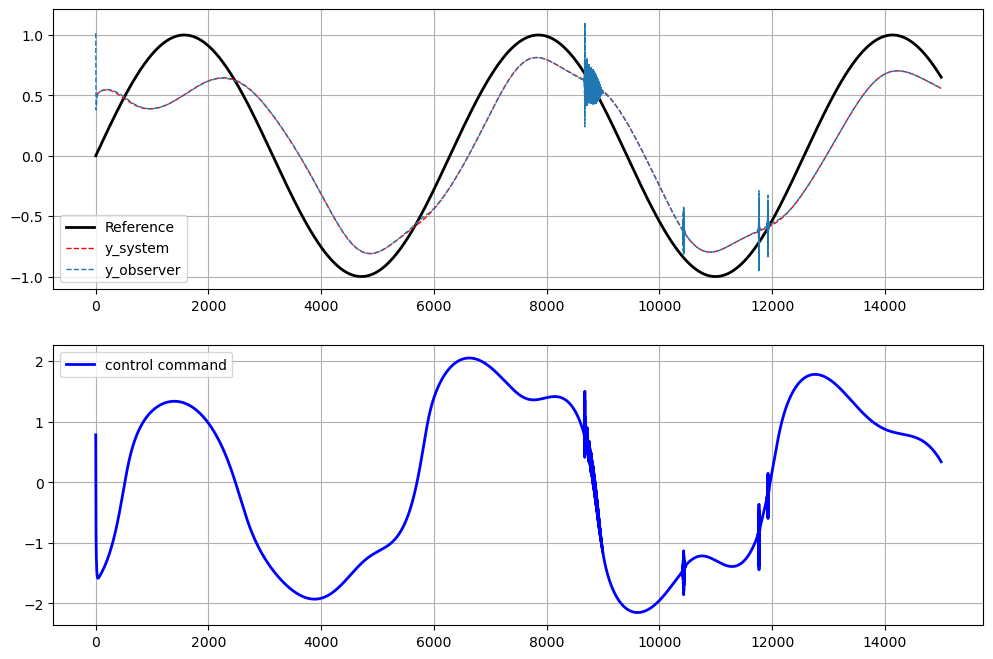

In [61]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(plant.reference, 'k-', linewidth = 2)
plt.plot(history['y'], 'r--', linewidth = 1)
plt.plot(history['y_observer'], '--', linewidth = 1)
plt.legend(['Reference', 'y_system', 'y_observer'])
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(history['u'], 'b-', label='control command', linewidth = 2)
plt.grid('on')
plt.legend()
